# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Train Model on CSOP I and Test on CSOP II

In [3]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [4]:
csop_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_positive_bert,stdev_positive_bert,min_positive_bert,max_positive_bert,average_negative_bert,stdev_negative_bert,min_negative_bert,max_negative_bert,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
0,2.560154,2.619974,-0.579449,-0.184948,-0.811817,-0.470829,0.002728,0.447286,-0.212418,0.252637,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1,1.944036,1.829637,0.063629,0.055324,0.108991,0.098656,-0.562120,-0.383167,-0.610320,-0.503285,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
2,-0.225970,-0.101179,-0.021033,0.784306,-0.599571,0.210663,-0.532375,-0.400842,-0.527997,-0.495390,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
3,0.724344,0.600746,0.166791,0.785652,-0.700573,0.265302,0.393377,0.612356,0.358543,0.569224,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
4,0.630254,0.802774,1.086431,0.654478,1.270946,1.040130,1.484151,2.795549,0.441100,2.311108,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,-0.592923,-0.609800,-0.494730,-0.483070,-0.372698,-0.509342,-0.413771,-0.422235,-0.283683,-0.431789,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
975,-0.592923,-0.609800,-0.494730,-0.483070,-0.372698,-0.509342,-0.413771,-0.422235,-0.283683,-0.431789,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
976,-0.592923,-0.609800,-0.494730,-0.483070,-0.372698,-0.509342,-0.413771,-0.422235,-0.283683,-0.431789,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
977,-0.592923,-0.609800,-0.494730,-0.483070,-0.372698,-0.509342,-0.413771,-0.422235,-0.283683,-0.431789,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [5]:
csop_model.select_target(target = "zscore_efficiency")

In [6]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3927	MAE: 0.5232	MSE: 0.586	RMSE: 0.7655
Validation Set:	R2: 0.244	MAE: 0.7147	MSE: 0.986	RMSE: 0.993
Test Set:	R2: 0.1353	MAE: 0.7025	MSE: 0.8638	RMSE: 0.9294


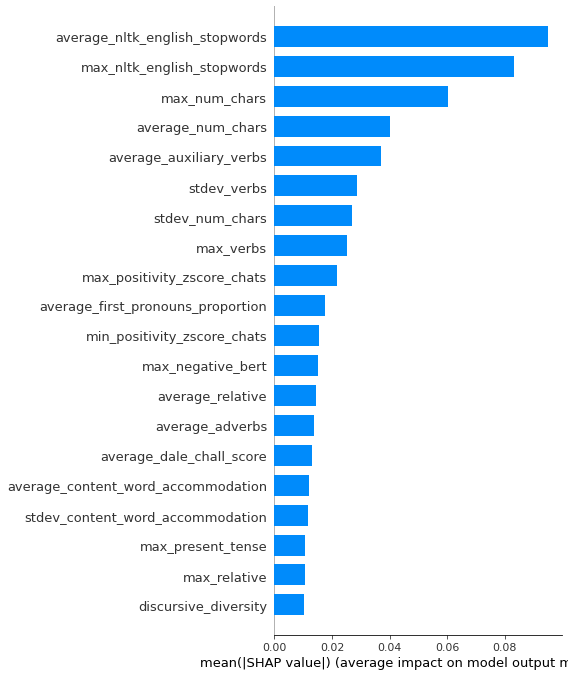

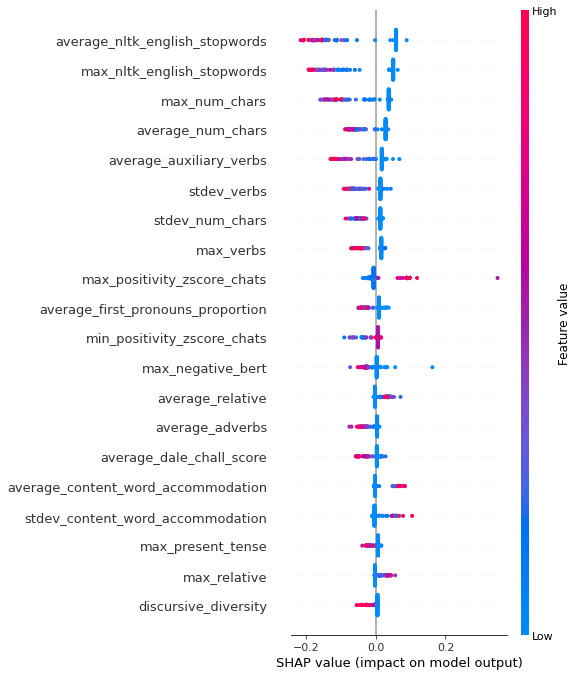

In [7]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [8]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [9]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3815	MAE: 0.5191	MSE: 0.6055	RMSE: 0.7781
Validation Set:	R2: 0.1754	MAE: 0.6951	MSE: 0.8656	RMSE: 0.9304
Test Set:	R2: 0.162	MAE: 0.7092	MSE: 0.9319	RMSE: 0.9653


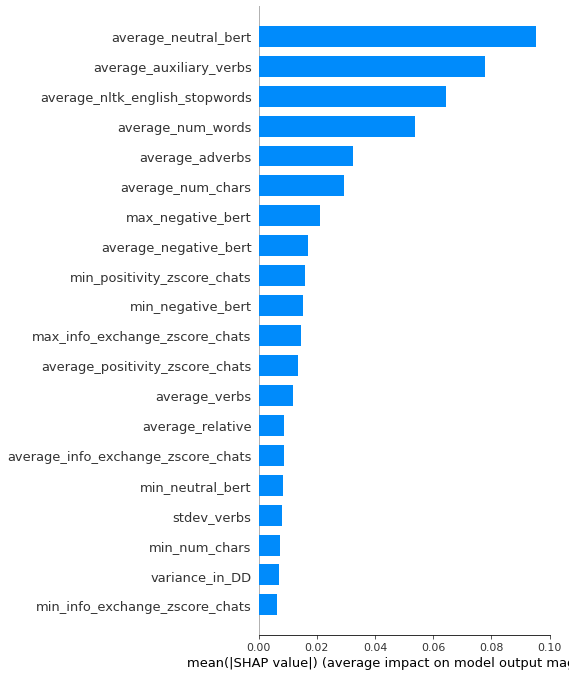

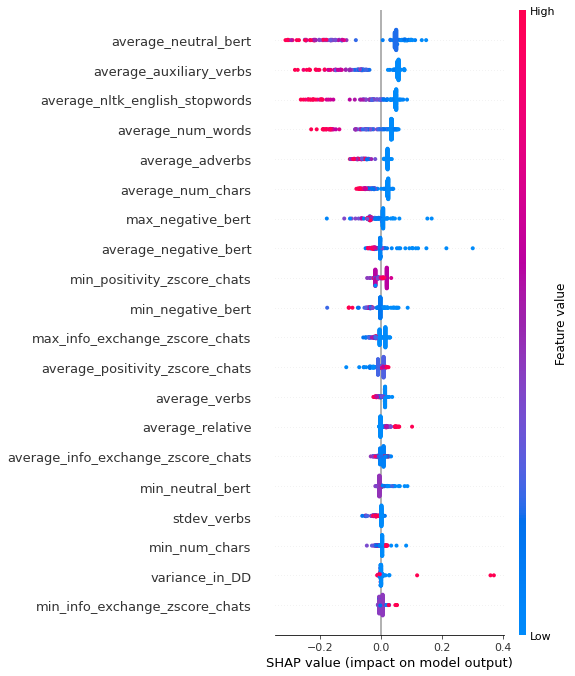

In [10]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3812	MAE: 0.5193	MSE: 0.6058	RMSE: 0.7783
Validation Set:	R2: 0.197	MAE: 0.6923	MSE: 0.8429	RMSE: 0.9181
Test Set:	R2: 0.1759	MAE: 0.6979	MSE: 0.9164	RMSE: 0.9573


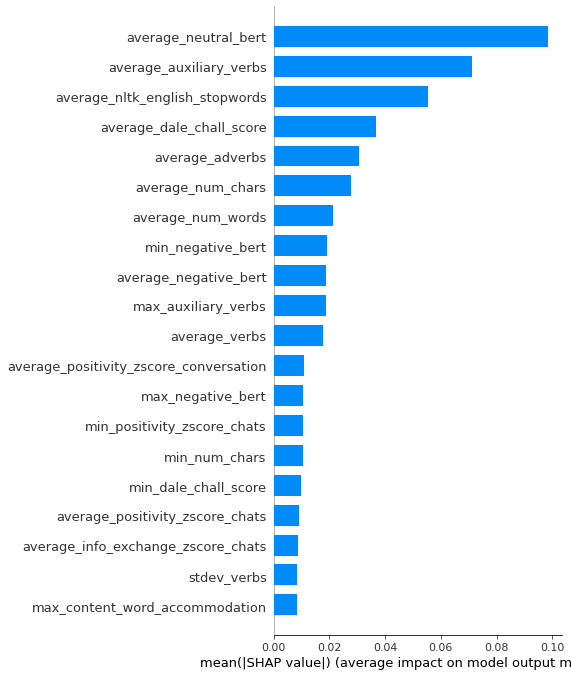

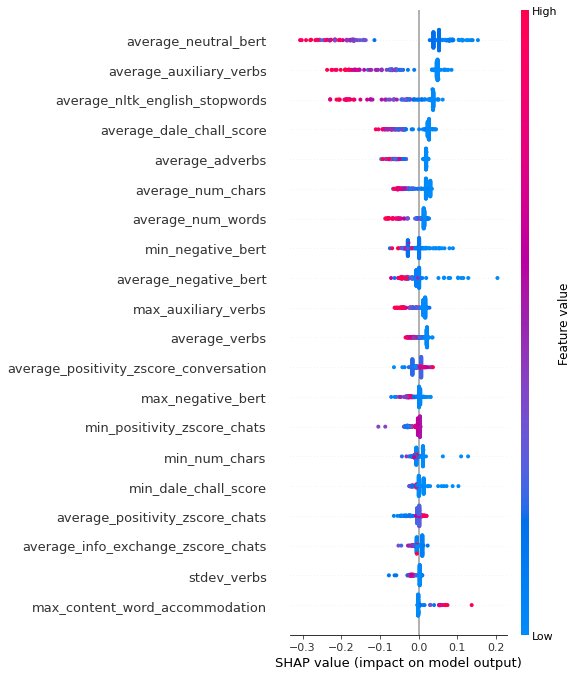

In [11]:
# What happens when we standardize within all datasets?
csop_blended_model_within = ModelBuilder(dataset_names = ["csop", "csopII"], standardize_within=True)
csop_blended_model_within.select_target(target=["zscore_efficiency", "efficiency"])
csop_blended_model_within.define_model(model_type = 'rf')
csop_blended_model_within.evaluate_model(csop_blended_model_within.baseline_model)

# Juries Model

In [12]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [13]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8664	MAE: 0.3193	MSE: 0.1378	RMSE: 0.3712
Validation Set:	R2: -0.0102	MAE: 0.7583	MSE: 0.7742	RMSE: 0.8799
Test Set:	R2: 0.1764	MAE: 0.723	MSE: 0.7095	RMSE: 0.8423


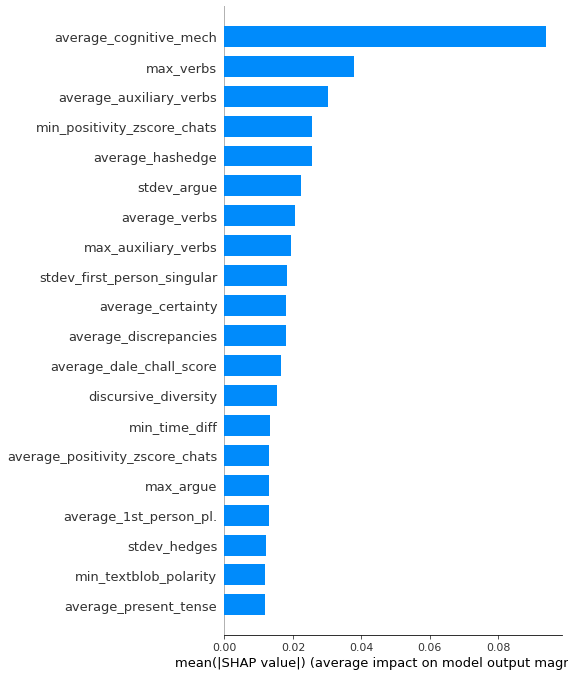

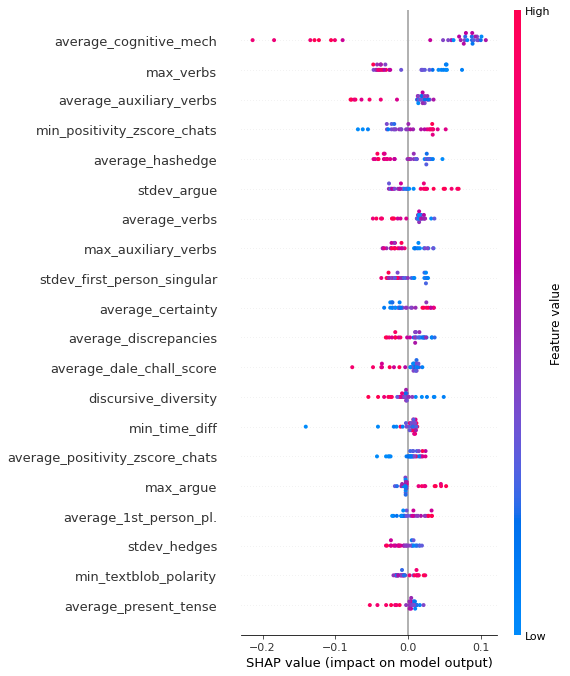

In [14]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model)

# Multi-Task Joint Model

In [15]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [16]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [17]:
# standardize_within defaults to false, so let's check what happens when we change it to true
joint_model_std_within = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= True)

In [18]:
joint_model_std_within.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [19]:
joint_model_std_within.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_positive_bert,stdev_positive_bert,min_positive_bert,max_positive_bert,average_negative_bert,stdev_negative_bert,min_negative_bert,max_negative_bert,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,-0.966684,-0.902061,0.397227,0.380423,-0.851301,0.278582,0.113484,0.908500,-0.794745,0.186909,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,-1.429728,-1.466075,0.012077,0.052050,0.281919,0.115768,0.970691,1.411029,-0.046481,1.225507,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,-0.069558,-0.155293,-0.561230,-0.080051,-0.693951,-0.088293,0.915335,1.224188,-0.142523,1.210539,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.431607,0.220723,0.099338,-0.109427,0.730156,-0.234979,0.583635,0.463493,0.773585,0.590340,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,-1.593301,-1.715586,0.860619,-0.344312,3.281181,0.025729,0.870803,-0.370206,1.642481,0.253381,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-1.155059,-1.157620,-0.959384,-0.905796,-0.453054,-0.944009,-0.722922,-0.798072,-0.126105,-0.781507,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2580,0.564689,0.672912,0.081071,-0.173935,0.276741,-0.158058,-0.150542,-0.441363,0.216361,-0.412680,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2581,-0.206233,-0.222889,1.229317,0.500401,0.980194,0.491746,-0.710504,-0.455140,-0.617386,-0.619559,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2582,-0.223529,-0.282177,0.451695,-0.038931,0.779383,0.339253,0.656739,0.661862,-0.385053,0.454787,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5188	MAE: 0.3741	MSE: 0.4823	RMSE: 0.6945
Validation Set:	R2: 0.115	MAE: 0.6919	MSE: 0.8744	RMSE: 0.9351
Test Set:	R2: 0.1291	MAE: 0.6863	MSE: 0.8544	RMSE: 0.9243


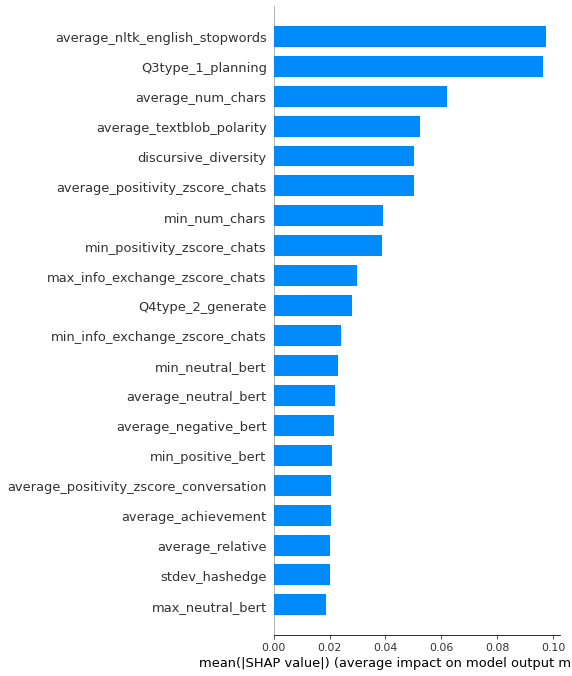

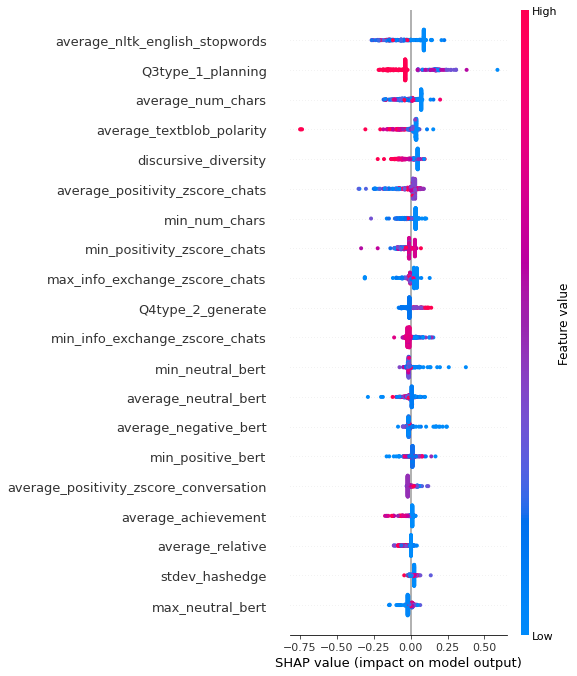

In [20]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.1669	MAE: 0.6886	MSE: 0.835	RMSE: 0.9138
Validation Set:	R2: 0.1011	MAE: 0.7118	MSE: 0.8881	RMSE: 0.9424
Test Set:	R2: 0.0961	MAE: 0.7135	MSE: 0.8868	RMSE: 0.9417


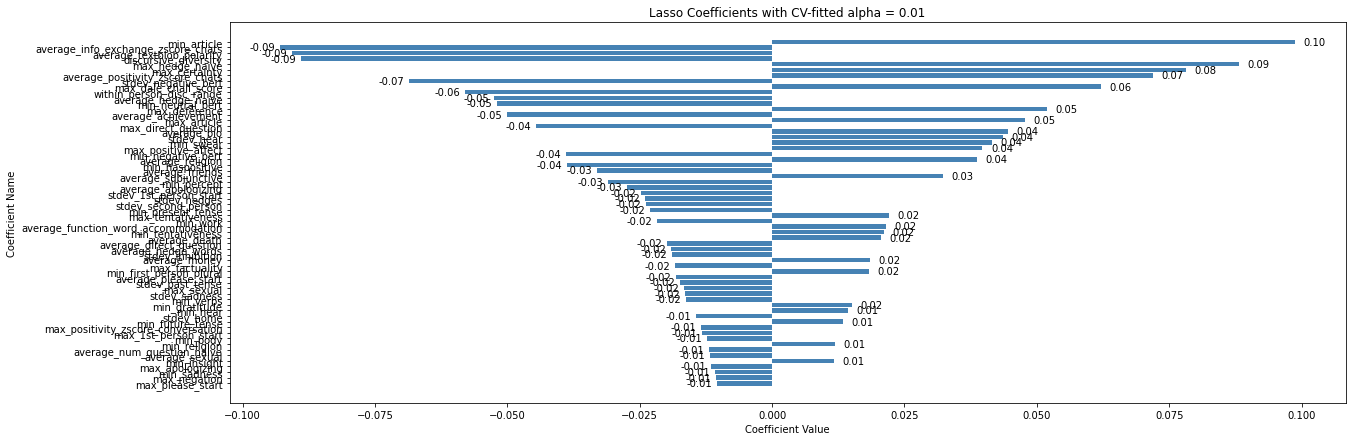

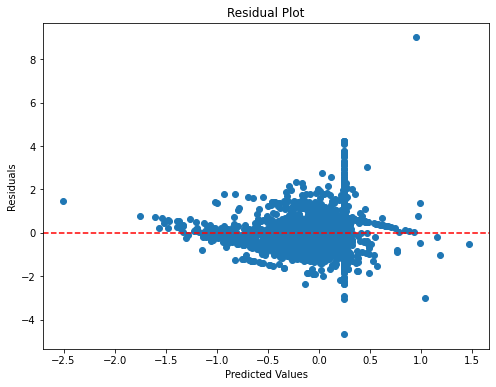

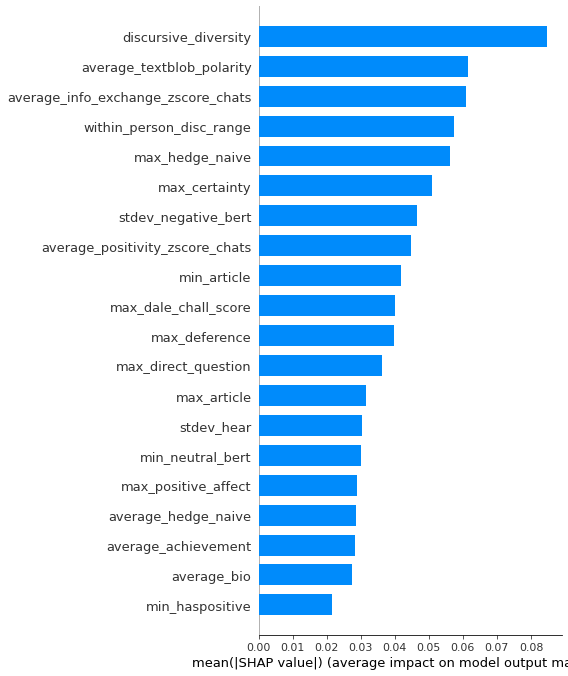

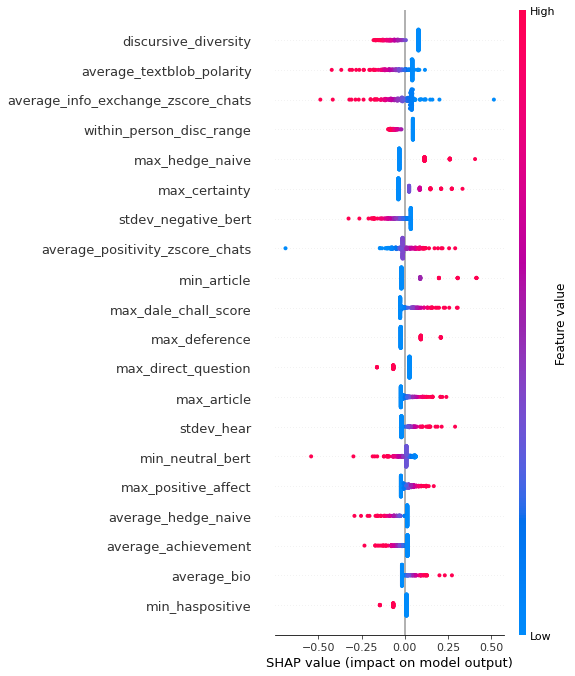

In [21]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.2149	MAE: 0.6822	MSE: 0.7869	RMSE: 0.8871
Validation Set:	R2: -0.2853	MAE: 0.8632	MSE: 1.2699	RMSE: 1.1269
Test Set:	R2: -0.3597	MAE: 0.8433	MSE: 1.334	RMSE: 1.155


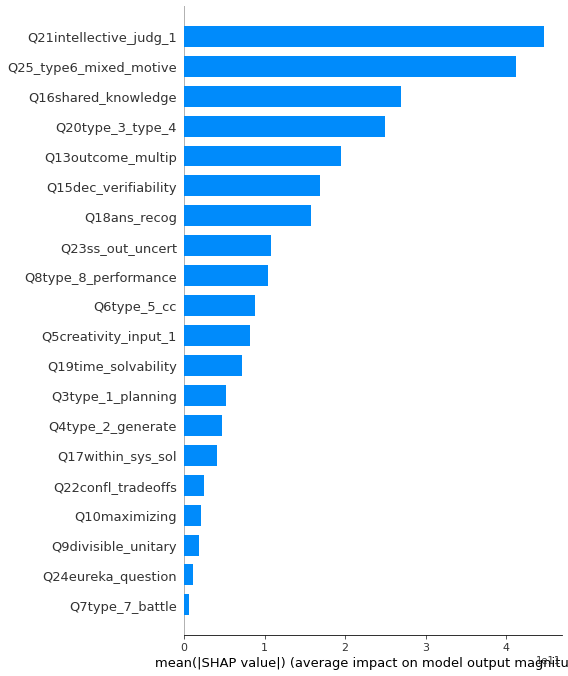

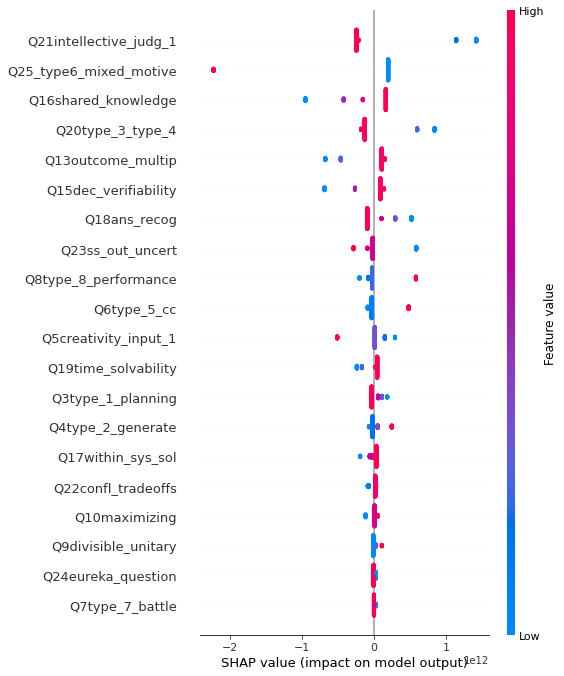

In [22]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model)

## Random Forest

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4674	MAE: 0.4811	MSE: 0.5337	RMSE: 0.7305
Validation Set:	R2: 0.1797	MAE: 0.6523	MSE: 0.8105	RMSE: 0.9003
Test Set:	R2: 0.1855	MAE: 0.6666	MSE: 0.7991	RMSE: 0.8939


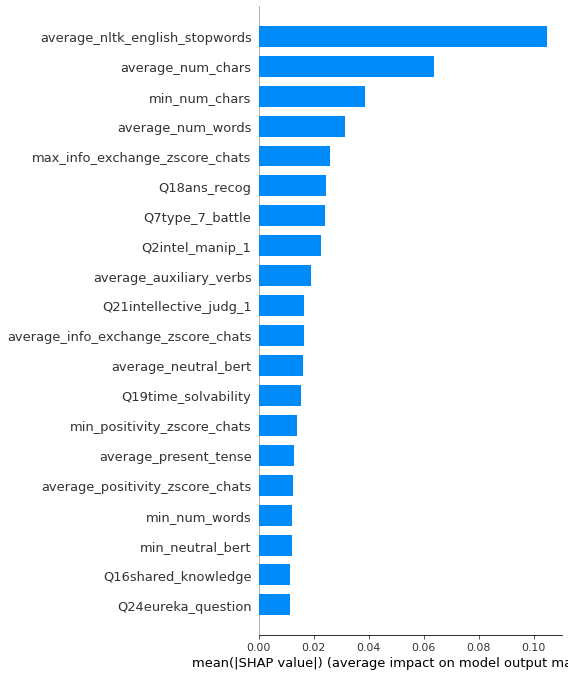

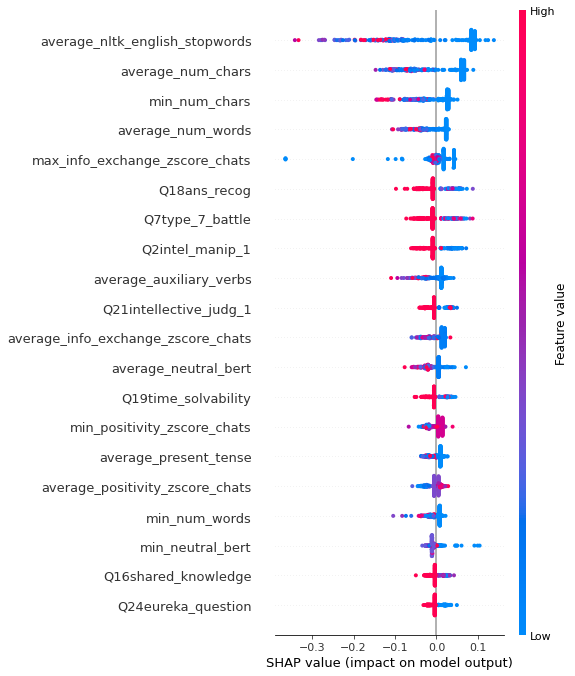

In [23]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4664	MAE: 0.4839	MSE: 0.5348	RMSE: 0.7313
Validation Set:	R2: 0.1697	MAE: 0.6697	MSE: 0.8204	RMSE: 0.9058
Test Set:	R2: 0.1842	MAE: 0.6712	MSE: 0.8004	RMSE: 0.8947


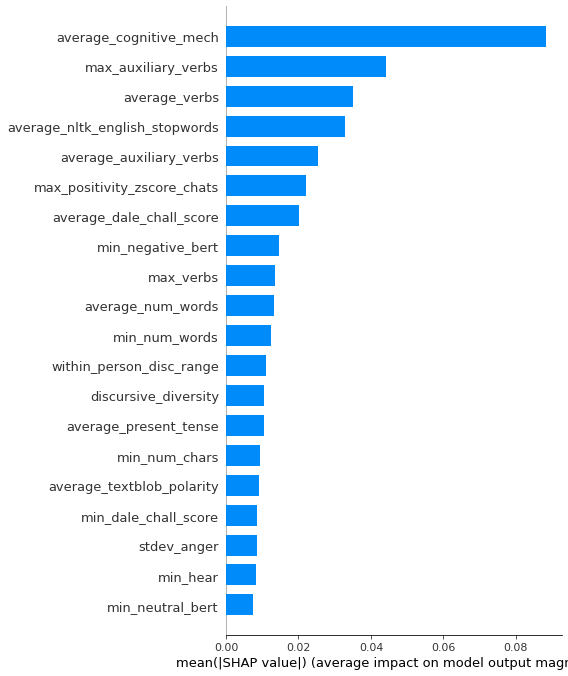

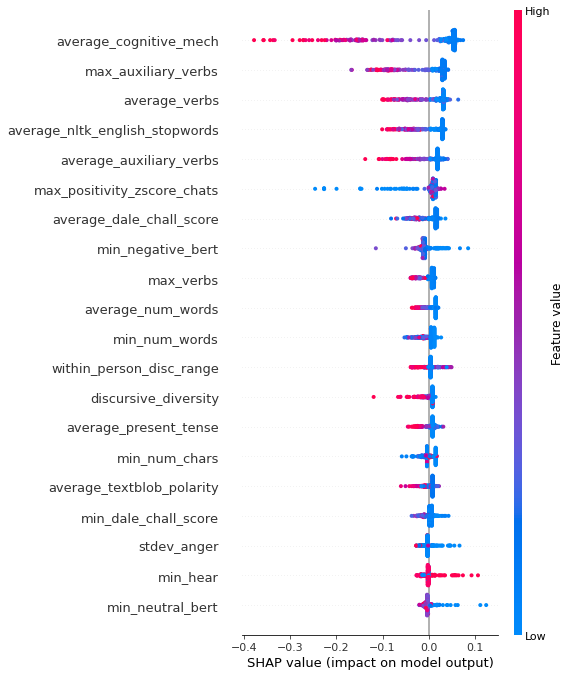

In [24]:
# compare to within-standardized version
joint_model_std_within.define_model(model_type = 'rf')
joint_model_std_within.evaluate_model(joint_model_std_within.baseline_model)